---
##Imports

In [ ]:
import os
import pandas as pd
import re
import wordcloud
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from matplotlib.pyplot import figure
import cv2
from google.colab.patches import cv2_imshow
import collections
from wordcloud import ImageColorGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


---
## Data Load and Preprocessing

In [ ]:
books_path ="/content/drive/MyDrive/Colab Notebooks/wordcloud/harrypotter" 
books_folder = os.listdir(books_path)

In [ ]:
#Tanımlamış olduğum path içerisindeki uzantısı txt olanları döndürelim:
books = [books for books in books_folder if books.endswith(".txt") ]
print(books)

['Book 1 - The Philosopher_s Stone.txt', 'Book 7 - The Deathly Hallows.txt', 'Book 3 - The Prisoner of Azkaban.txt', 'Book 2 - The Chamber of Secrets.txt', 'Book 4 - The Goblet of Fire.txt', 'Book 5 - The Order of the Phoenix.txt', 'Book 6 - The Half Blood Prince.txt', 'adresgezgini.txt', 'tum_kitaplar_stopwordler_atilmis.txt']


In [ ]:
#Eğer dataset kısmında birden fazla txt varsa sadece hp kitaplarını almak için
books = books[:7]
books

['Book 1 - The Philosopher_s Stone.txt',
 'Book 7 - The Deathly Hallows.txt',
 'Book 3 - The Prisoner of Azkaban.txt',
 'Book 2 - The Chamber of Secrets.txt',
 'Book 4 - The Goblet of Fire.txt',
 'Book 5 - The Order of the Phoenix.txt',
 'Book 6 - The Half Blood Prince.txt']

In [ ]:
long_string = []
for book in books:
  path = books_path + "/" + str(book)
  with open(path,'r') as f:
    for line in f:
       long_string.append("".join(line))

Data Cleaner Function

In [ ]:
# Veriyi temizlerken kullanacağım fonksiyon: 
def cleanText(input_sentence):
  """
  Veriyi temizlemeye yarar.
  input_sentence: Temizlenecek veri. {str}
  tmp1: return edilecek metindir. {str}
  """

  tmp= [word.replace('A','a') for word in input_sentence.split(' ')]
  tmp= [word.lower() for word in tmp]
  tmp= [word.replace('i̇','i') for word in tmp]
  tmp = [re.sub('[^A-Za-z0-9ğüşıçöiâî]+', ' ', word) for word in tmp]
  tmp = [word.strip(' ') for word in tmp]
  tmp1 =' '.join(tmp)

  return tmp1

In [ ]:
def listToString(liste): 
  """
  Listeyi string'e çevirir. String return eder.
  liste: stringe çevirilecek liste {liste} 
  """
  # boş bir string tanımladım
  str1 = " " 
   
  return (str1.join(liste))

In [ ]:
# Daha güzel sonuçlar elde edebilmek için stopword'leri atalım:
stopwords = set(wordcloud.STOPWORDS)

# Veriyi incelerken gördüğüm ve wordcloud'da görmek istemediğim kelimeleri
# de stopword'e eklemek için liste tanımladım.
extra_stopwords_list = ["page", "said", "ve", "on", 'take', 're', 'got', 'j', 's', 'd'
                        "d", "t", "", "ll", "will", "mr", "may", "come"] 
[stopwords.add(i) for i in extra_stopwords_list]

STP = listToString(stopwords)
STP = STP.split(" ")

In [ ]:
long_string = listToString(long_string)

In [ ]:
# Metne temizleme için tanımladığım fonksiyonu uyguladım.
long_string = cleanText(long_string)

In [ ]:
long_string = long_string.split(" ")

In [ ]:
#Oluşturulan corpus kaç kelimeden oluşmakta :
len(long_string)

1420901

In [ ]:
#Kesişimleri alalım:
aynılar = set(STP).intersection(long_string)

In [ ]:
from tqdm import tqdm

In [ ]:
#stopword'leri ana metinden ayıklıyorum. Bu işlem biraz uzun sürebileceğini
# düşündüğüm için bir progress bar koyuyorum :
for aynı in tqdm(aynılar) :
  #count = long_string.count(drop_word)
  long_string = [s for s in long_string if s != aynı]

100%|██████████| 152/152 [00:09<00:00, 15.66it/s]


In [ ]:
# Görülebileceği üzere kelime sayım düştü.
len(long_string)

583405

In [ ]:
#Tekrar tekrar preprocess yapmak yerine stopword'lerden arındırıp bir txt'ye kaydettim:
with open("/content/drive/MyDrive/Colab Notebooks/wordcloud/harrypotter/tum_kitaplar_stopwordler_atilmis.txt", "w") as output:
    output.write(str(long_string))

In [ ]:
word_counts = collections.Counter(long_string)  # Her kelimeden ne kadar var saydırıyorum
word_counts_top20 = word_counts.most_common(20)  # En çok tekrar eden 20 kelime:
print(word_counts_top20)

[('harry', 21920), ('ron', 6329), ('potter', 5887), ('hermione', 5357), ('rowling', 4713), ('dumbledore', 3365), ('back', 3243), ('now', 2691), ('one', 2652), ('know', 2515), ('looked', 2361), ('around', 2261), ('d', 2075), ('well', 2053), ('hagrid', 2042), ('professor', 2034), ('don', 1969), ('see', 1933), ('snape', 1827), ('though', 1814)]


## Stopword'lerden arındırılmış veri setini import etme

In [ ]:
book_path ="/content/drive/MyDrive/Colab Notebooks/wordcloud/harrypotter/tum_kitaplar_stopwordler_atilmis.txt" 
with open(book_path, "r") as f:
  long_string = f.readlines()

---
## Simple Exercises

In [ ]:
#wordcloud_example = wordcloud.WordCloud(stopwords=stopwords).generate(long_string) 
# Yukarıdaki gibi dümdüz generate etmek yerine frekansa göre generate edelim
wordcloud_example = wordcloud.WordCloud(margin=10, stopwords=stopwords, background_color="white").generate_from_frequencies(word_counts)

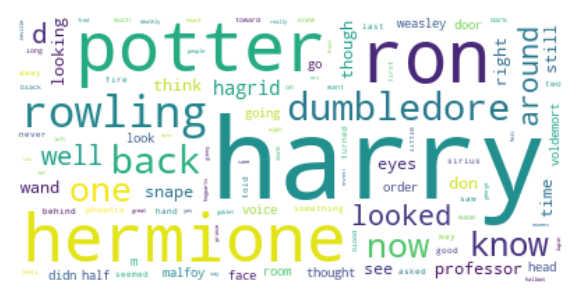

In [ ]:
figure(dpi=120)
plt.imshow(wordcloud_example, interpolation='bilinear')
plt.axis("off")
plt.show()

---
## Farklı imgeler üzerine maskeleyerek deneme

In [ ]:
folder_path = "/content/drive/MyDrive/Colab Notebooks/wordcloud/harrypotter"
harry_img_path = f"{folder_path}/hp.jpg"

mask = np.array(Image.open(harry_img_path))

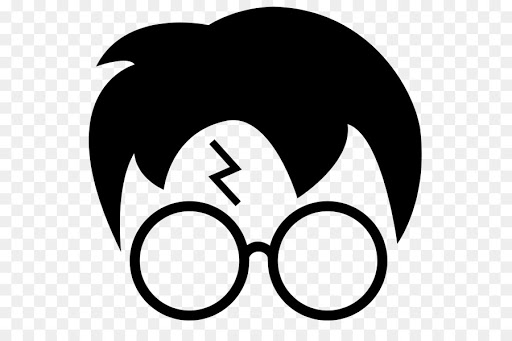

In [ ]:
img = cv2.imread(harry_img_path)
cv2_imshow(img)

In [ ]:
wordcloud_example = wordcloud.WordCloud(stopwords=stopwords, mask=mask, background_color="white").generate_from_frequencies(word_counts)

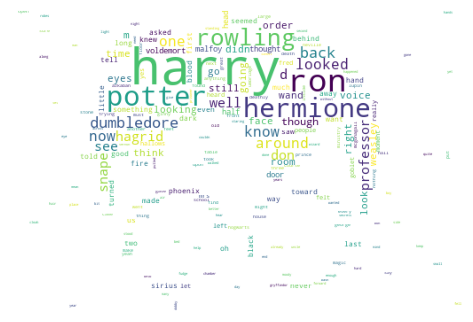

In [ ]:
#figure(figsize=(24, 22), dpi=100)
figure(dpi=100)
plt.imshow(wordcloud_example)
plt.axis("off")
plt.show()

#For save the plot img 
#wordcloud_example.to_file("wordcloud.png")

---
## Elimize hazır ulaşmayan ve threshold'unu çıkarmamız gereken bir imge üzerinden deneyelim:

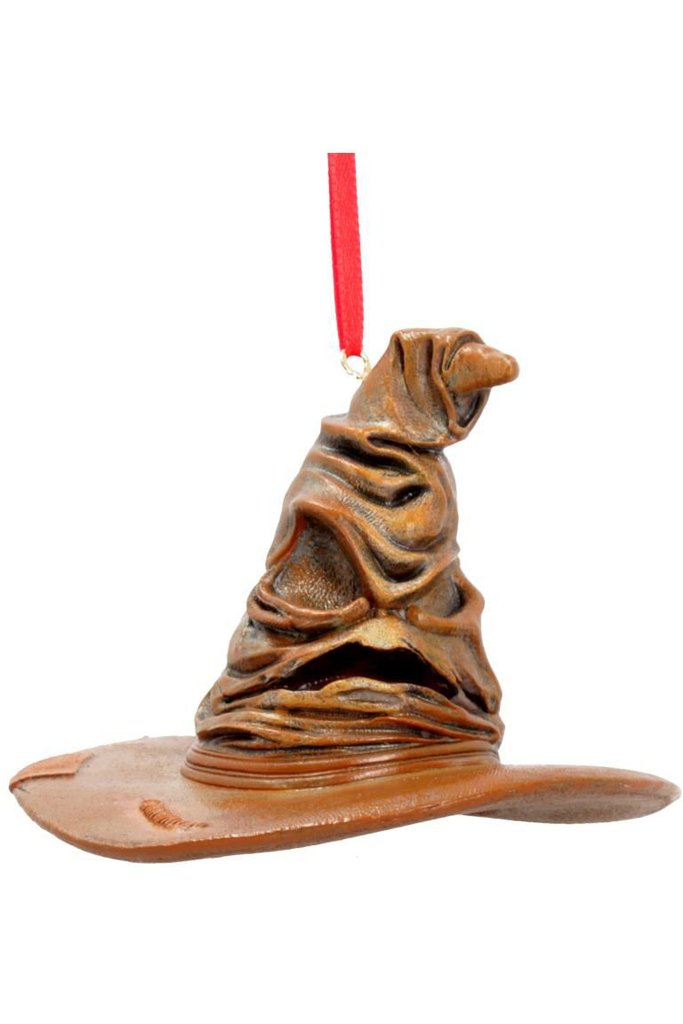

In [ ]:
preprocess_path = f"{folder_path}/preprocess.jpg"
img = cv2.imread(preprocess_path)
cv2_imshow(img)

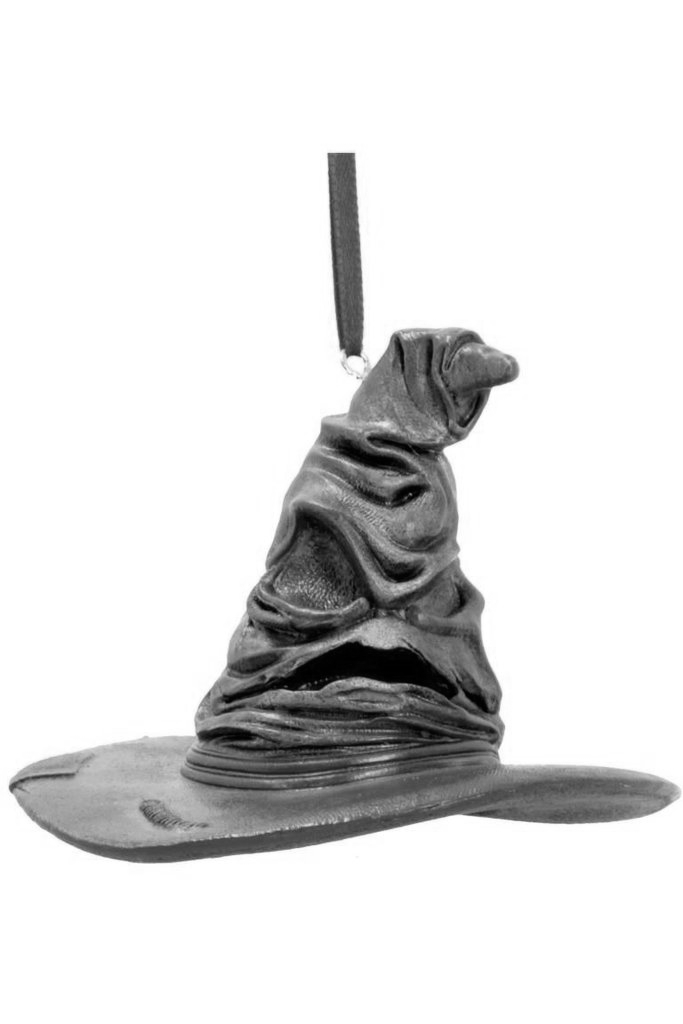

In [ ]:
gray = cv2.cvtColor(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2GRAY)
cv2_imshow(gray)

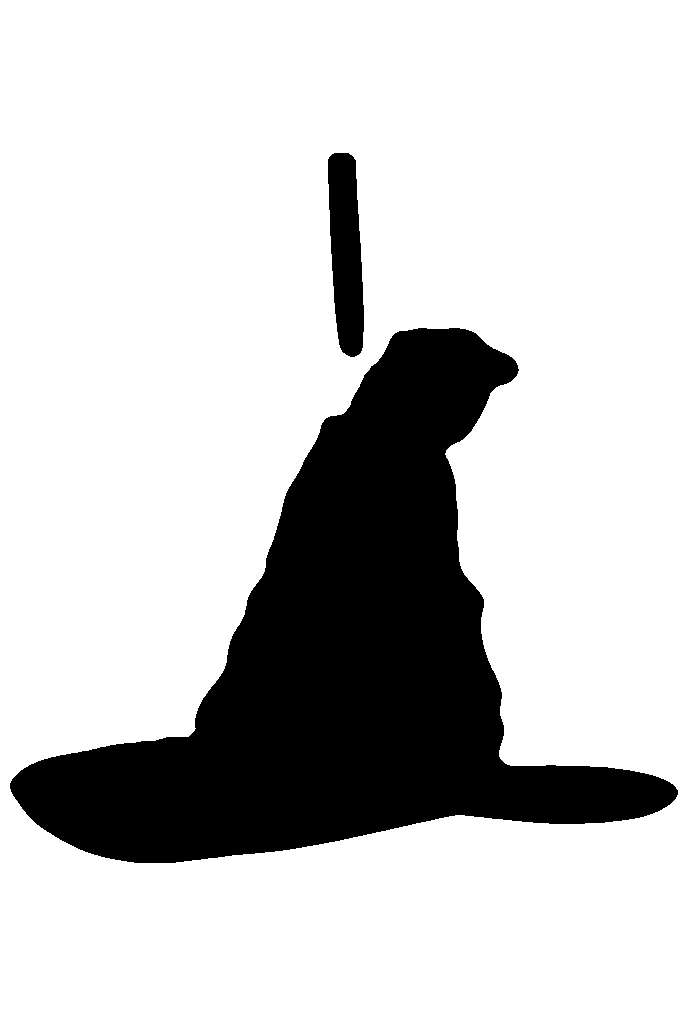

In [ ]:
(T, threshold) = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
with_thresh = cv2.medianBlur(threshold, 15, 0)
cv2_imshow(with_thresh)

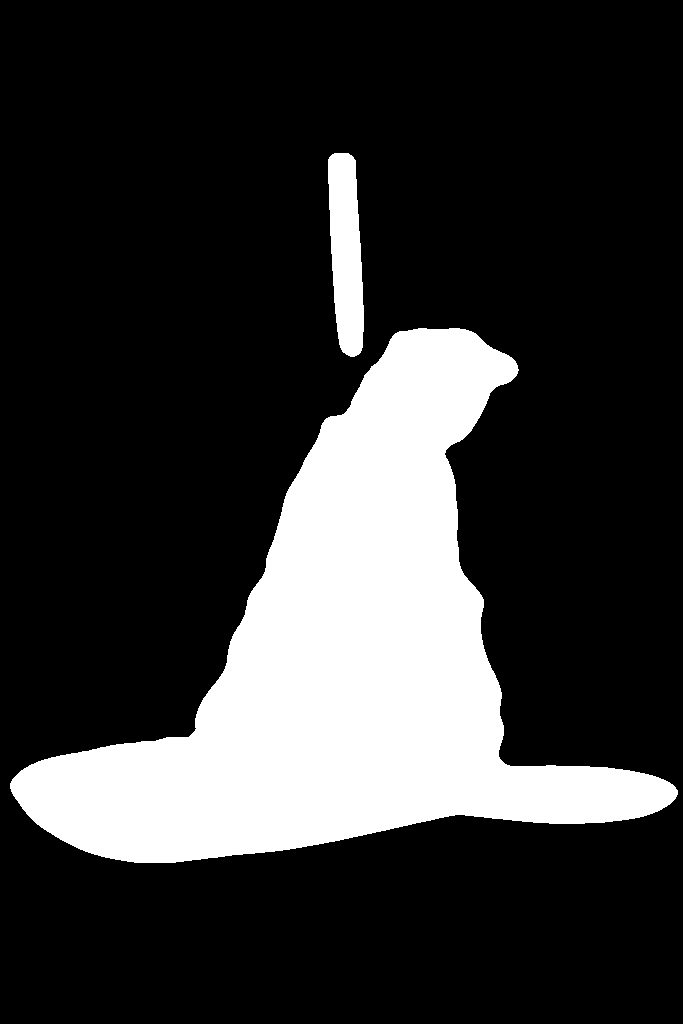

In [ ]:
""" 
# Buraya  gerek yok çünkü bizim için önemli olan yerlerin siyah gelmesi lazım
# burada ise tam tersi bir işlem greçekleştiriliyor.
(T, threshold) = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)
with_thresh_inv = cv2.medianBlur(threshold, 15, 0)
cv2_imshow(with_thresh_inv)
"""

In [ ]:
wordcloud_example = wordcloud.WordCloud(stopwords=stopwords, mask=with_thresh, background_color="white").generate_from_frequencies(word_counts)

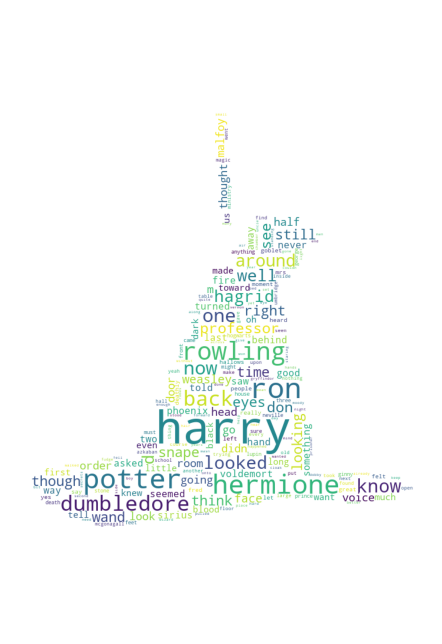

In [ ]:
#figure(figsize=(24, 22), dpi=100)
figure(dpi=200)
plt.imshow(wordcloud_example)
plt.axis("off")
plt.show()

Aynı imgeyi bu sefer kenarlarını kırmızı yaparak çizdirelim. contour_width ve contour_color parametrelerini kullanmak yeterli olacaktır.

In [ ]:
wordcloud_example = wordcloud.WordCloud(stopwords=stopwords, mask=with_thresh, contour_width=3, contour_color='firebrick', background_color="white").generate_from_frequencies(word_counts)

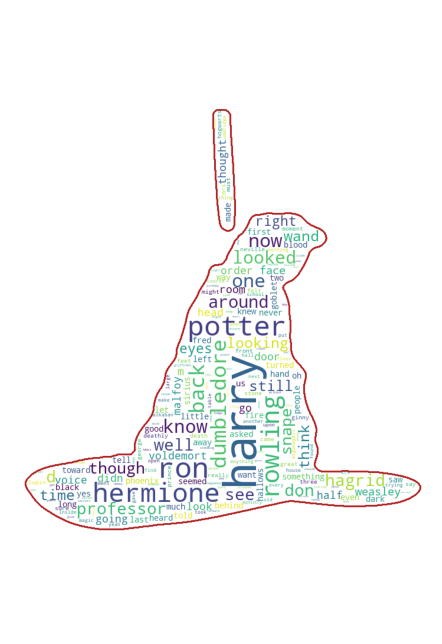

In [ ]:
figure(dpi=200)
plt.imshow(wordcloud_example)
plt.axis("off")
plt.show()

In [ ]:
hermonie_path = f"{folder_path}/hermonie.jpg"
img = cv2.imread(hermonie_path)
gray = cv2.cvtColor(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cv2.COLOR_BGR2GRAY)
(T, threshold) = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY)
with_thresh = cv2.medianBlur(threshold, 15, 0)

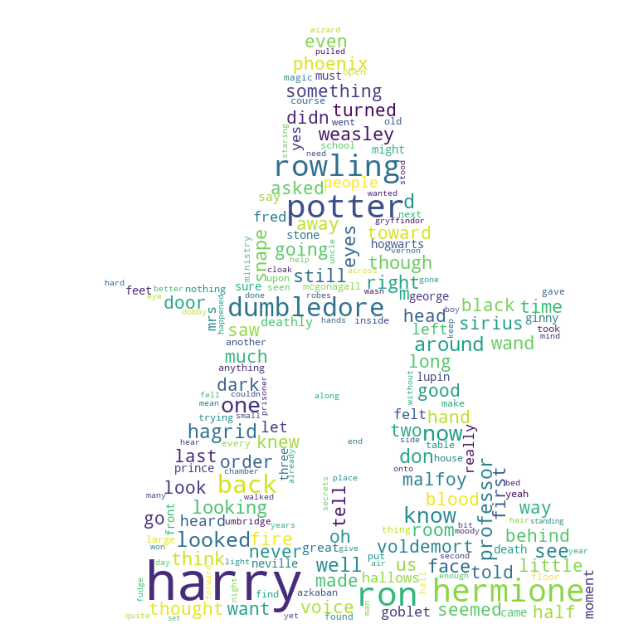

In [ ]:
wordcloud_example = wordcloud.WordCloud(stopwords=stopwords, mask=with_thresh, background_color="white").generate_from_frequencies(word_counts)
figure(dpi=200)
plt.imshow(wordcloud_example)
plt.axis("off")
plt.show()

Şimdi ise oluşturduğumuz wordcloud'un renk seçimi için orjinal resimdeki renkleri kullanmasını sağlayacağız.

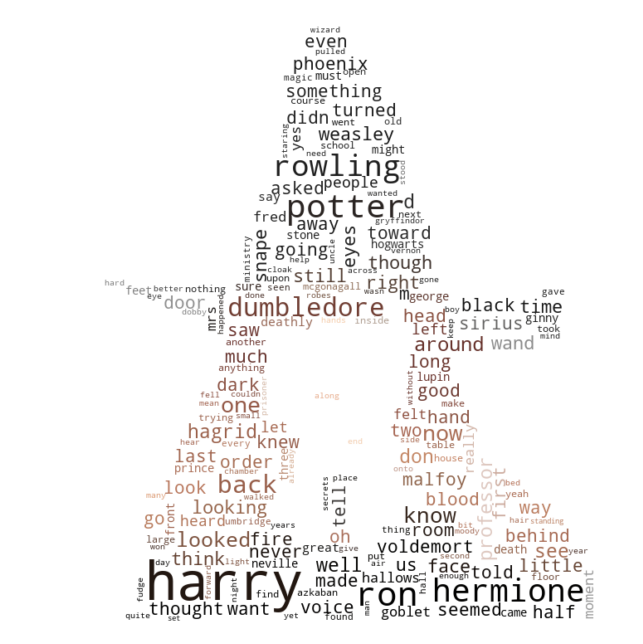

In [ ]:
img1 = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) #renk uzayını değiştirdim ki renkler düzgün görünsün.
image_colors = ImageColorGenerator(img1)
figure(dpi=200)
plt.imshow(wordcloud_example.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
plt.show()

###Oluşturulan wordcloud'ları kaydetmek için:

In [ ]:
wordcloud_example.to_file("/content/hermonie_with_wordcloud.png")

## Bana Ulaşın!
[![](https://user-images.githubusercontent.com/56072259/121079707-28be5d00-c7e3-11eb-9666-9acb3dd9526a.png)](https://www.linkedin.com/in/semih-gulum/)
[![](https://user-images.githubusercontent.com/56072259/121079953-7c30ab00-c7e3-11eb-8e4d-506fabc530a5.png)](mailto:sgulum98@gmail.com)
[![](https://user-images.githubusercontent.com/56072259/121080373-0416b500-c7e4-11eb-833c-e6abe08efea0.png)](https://semihstp.github.io/)